In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.15


In [4]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object

In [15]:
def act(t,robot):
    
    tx,ty=18,18
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y
    
    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d= sqrt((tx-cx)**2 + (ty-cy)**2)
    angle=degrees(arctan2(ty-cy,tx-cx))
    
    robot['left'].F=robot['right'].F= d*30
    robot['left'].F_angle=robot['right'].F_angle=angle 
    

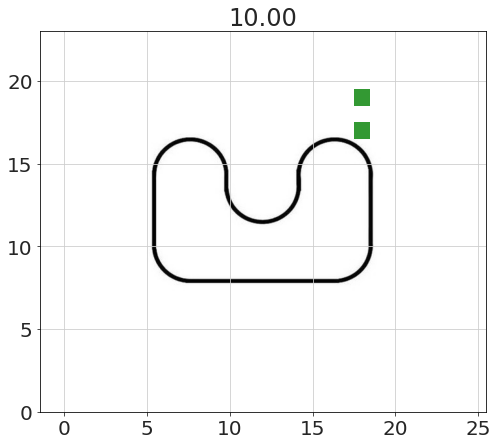

In [16]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )